In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Hitachi/Data/merged_whole_data.csv"
data_df = pd.read_csv(data_path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34899 entries, 0 to 34898
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Delivery Day      34899 non-null  object 
 1   Hours             34899 non-null  object 
 2   Prices
(EUR/MWh)  34899 non-null  float64
 3   datetime          34899 non-null  object 
 4   Demand (MW)       27555 non-null  float64
 5   Name              27720 non-null  object 
 6   Temperature       27720 non-null  float64
 7   feelslike         27720 non-null  float64
 8   dewpoint          27720 non-null  float64
 9   humidity          27720 non-null  float64
 10  precipitation     27720 non-null  float64
 11  precipprob        27720 non-null  float64
 12  preciptype        2751 non-null   object 
 13  snow              27702 non-null  float64
 14  snowdepth         27702 non-null  float64
 15  windgust          12223 non-null  float64
 16  windspeed         27720 non-null  float6

<ipython-input-164-7178cb5662a5>:2: DtypeWarning: Columns (5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(data_path)


In [ ]:
copy_data_df = data_df.copy()

In [ ]:
data_df.drop(columns = ["Delivery Day", "Hours"], axis = 1, inplace=True)

In [ ]:
data_df.head()

,Prices\n(EUR/MWh),datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,26.38,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,0.0,0.0,...,NaN,4.7,230.0,1015.3,100.0,9.9,0.0,0.0,NaN,Overcast
1,26.50,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,0.0,0.0,...,NaN,3.4,230.0,1015.4,100.0,9.9,0.0,0.0,NaN,Overcast
2,27.01,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,0.0,0.0,...,NaN,4.7,220.0,1015.3,88.9,9.9,0.0,0.0,NaN,Partially cloudy
3,27.40,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,0.0,0.0,...,NaN,3.4,240.0,1015.2,0.0,9.9,0.0,0.0,NaN,Clear
4,27.99,2020-01-01 05:00:00,432.1,Pokhara,34.1,29.8,28.1,78.64,0.0,0.0,...,NaN,4.7,230.0,1015.4,0.0,9.9,0.0,0.0,NaN,Clear


## Column Description
* Prices (EUR/MWh): Cost of electricity per megawatt-hour, influencing economic factors and consumer demand.

* Datetime: Time and date, affecting energy demand patterns based on daily and seasonal variations.

* Demand (MW): Total power consumption, directly impacting energy demand.

* Temperature: Ambient temperature affecting heating or cooling needs, influencing energy demand.

* Feelslike: Perceived temperature, impacting consumer behavior and energy usage patterns.

* Dewpoint: Temperature at which air becomes saturated, influencing humidity and potentially affecting cooling systems.

* Humidity: Amount of moisture in the air, affecting cooling systems and energy demand.

* Precipitation: Rain or snowfall, impacting outdoor activities and potentially affecting energy usage.

* Precipprob: Probability of precipitation, influencing consumer behavior and energy demand planning.

* Preciptype: Type of precipitation (rain, snow), impacting energy demand for heating or cooling.

* Snow: Snowfall, affecting transportation and potentially influencing energy demand.

* Snowdepth: Depth of accumulated snow, influencing outdoor activities and potentially affecting energy demand.

* Windgust: Sudden increase in wind speed, impacting energy generation and, indirectly, demand.

* Windspeed: Continuous wind speed, affecting energy generation and potentially influencing demand.

* Winddirection: Direction from which the wind is blowing, impacting energy generation and demand patterns.

* Sealevelpressure: Atmospheric pressure, affecting weather patterns and potentially influencing energy demand.

* Cloudcover: Fraction of sky covered by clouds, influencing solar power generation and energy demand.

* Visibility: Horizontal distance an observer can see, affecting transportation and potentially influencing energy demand.

* Solarradiation: Sun's energy reaching Earth's surface, influencing solar power generation and energy demand.

* UVindex: Measure of ultraviolet radiation, potentially influencing outdoor activities and energy demand.

* Severerisk: Likelihood of severe weather events, impacting infrastructure and potentially affecting energy demand.

* Conditions: Overall weather state, including multiple factors, impacting consumer behavior and energy usage patterns.









In [ ]:
data_df.columns

Index(['Prices\n(EUR/MWh)', 'datetime', 'Demand (MW)', 'Name', 'Temperature',
       'feelslike', 'dewpoint', 'humidity', 'precipitation', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed',
       'winddirection', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'uvindex', 'severerisk', 'conditions'],
      dtype='object')

# Descriptive Analysis

In [ ]:
data_df.isnull().sum()

Prices\n(EUR/MWh)        0
datetime                 0
Demand (MW)           7344
Name                  7179
Temperature           7179
feelslike             7179
dewpoint              7179
humidity              7179
precipitation         7179
precipprob            7179
preciptype           32148
snow                  7197
snowdepth             7197
windgust             22676
windspeed             7179
winddirection         7179
sealevelpressure      7197
cloudcover            7179
visibility            7197
solarradiation        7179
uvindex               7179
severerisk           24945
conditions            7179
dtype: int64

In [ ]:
non_null_count_all_columns = (data_df.notnull().all(axis=1)).sum()

print("Number of rows with no NULL values in all columns:", non_null_count_all_columns)

Number of rows with no NULL values in all columns: 1476


In [ ]:
rows_with_negative_prices = data_df[data_df["Prices\n(EUR/MWh)"] < 0]

# Print the rows with prices less than 0
print(len(rows_with_negative_prices))
rows_with_negative_prices.head()

86


,Prices\n(EUR/MWh),datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
1233,-5.00,2020-02-21 10:00:00,616.6,Pokhara,27.0,27.0,11.0,50.54,0.000,0.0,...,NaN,0.0,0.0,1041.0,0.0,9.9,563.0,6.0,NaN,Clear
1234,-8.12,2020-02-21 11:00:00,608.0,Pokhara,29.0,23.9,11.9,48.34,0.000,0.0,...,NaN,4.7,9.3,1040.8,0.0,9.9,688.0,7.0,NaN,Clear
1235,-1.99,2020-02-21 12:00:00,593.0,Pokhara,32.0,26.4,10.1,39.57,0.000,0.0,...,NaN,5.8,9.2,1039.8,0.0,9.9,753.0,8.0,NaN,Clear
4091,-0.91,2020-06-19 12:00:00,780.0,Pokhara,87.2,86.9,60.2,40.35,0.000,0.0,...,NaN,3.4,260.0,1017.9,27.3,9.9,947.0,9.0,NaN,Partially cloudy
11191,-0.98,2021-04-11 07:00:00,371.3,Pokhara,51.2,51.2,47.0,85.69,0.005,100.0,...,35.6,13.9,240.0,998.4,100.0,6.2,13.0,0.0,NaN,"Rain, Overcast"


In [ ]:
data_df.describe()

,Prices\n(EUR/MWh),Demand (MW),Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk
count,34899.000000,27555.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27702.000000,27702.000000,12223.000000,27720.000000,27720.000000,27702.000000,27720.000000,27702.000000,27720.000000,27720.000000,9954.000000
mean,132.955080,551.811787,56.846847,55.505018,45.486089,68.485757,0.005618,6.908369,0.001205,0.044258,15.449611,6.499069,158.488175,1018.008913,39.796815,9.183842,163.639946,1.614430,13.055957
std,120.246525,114.435250,18.734390,21.558142,18.198644,18.189507,0.044799,25.360098,0.041213,0.377761,8.627404,4.765840,120.235734,6.702345,44.949277,1.902787,265.417780,2.662525,13.499753
min,-35.000000,320.000000,-5.900000,-30.100000,-14.900000,17.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,991.400000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,47.985000,474.500000,42.200000,38.000000,29.900000,55.172500,0.000000,0.000000,0.000000,0.000000,8.300000,3.400000,30.000000,1013.900000,0.000000,9.900000,0.000000,0.000000,10.000000
50%,95.440000,529.500000,56.900000,56.900000,46.100000,70.540000,0.000000,0.000000,0.000000,0.000000,14.300000,5.800000,180.000000,1017.500000,0.000000,9.900000,12.000000,0.000000,10.000000
75%,179.245000,601.900000,72.000000,72.000000,62.100000,83.960000,0.000000,0.000000,0.000000,0.000000,21.900000,9.200000,260.000000,1022.300000,100.000000,9.900000,222.000000,2.000000,10.000000
max,1047.100000,1020.200000,99.000000,110.400000,79.100000,100.000000,2.376000,100.000000,4.700000,5.780000,57.500000,38.000000,360.000000,1041.500000,100.000000,34.900000,1197.000000,10.000000,100.000000


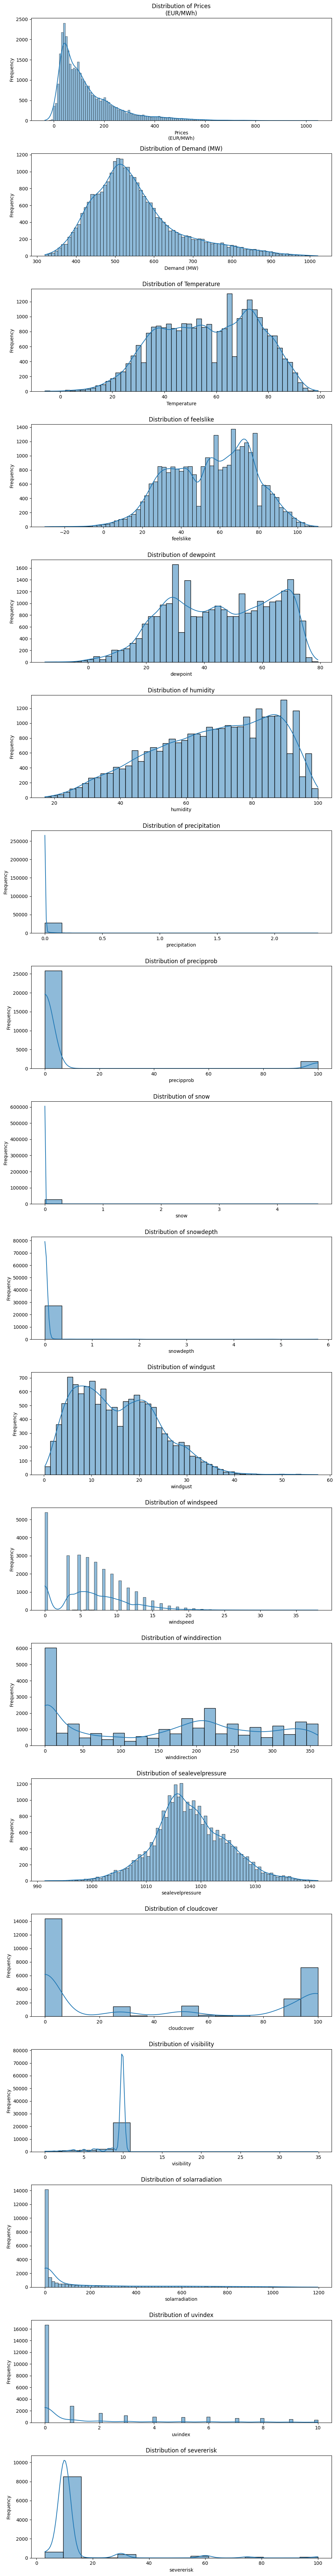

In [ ]:
# Filter columns with float type
float_columns = data_df.select_dtypes(include='float64').columns

# Set up subplots based on the number of float columns
num_plots = len(float_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 4 * num_plots))

# Plot distribution for each float column
for i, column in enumerate(float_columns):
    sns.histplot(data_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

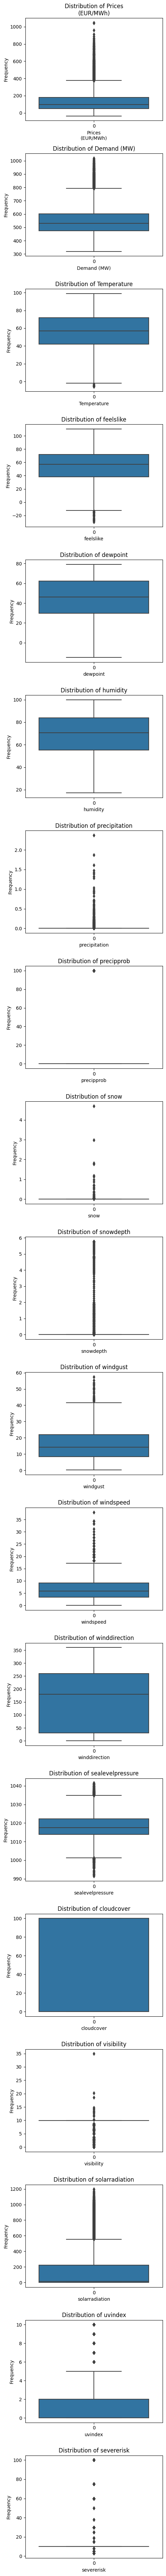

In [ ]:
# Filter columns with float type
float_columns = data_df.select_dtypes(include='float64').columns

# Set up subplots based on the number of float columns
num_plots = len(float_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(5, 4 * num_plots))

# Plot distribution for each float column
for i, column in enumerate(float_columns):
    sns.boxplot(data_df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

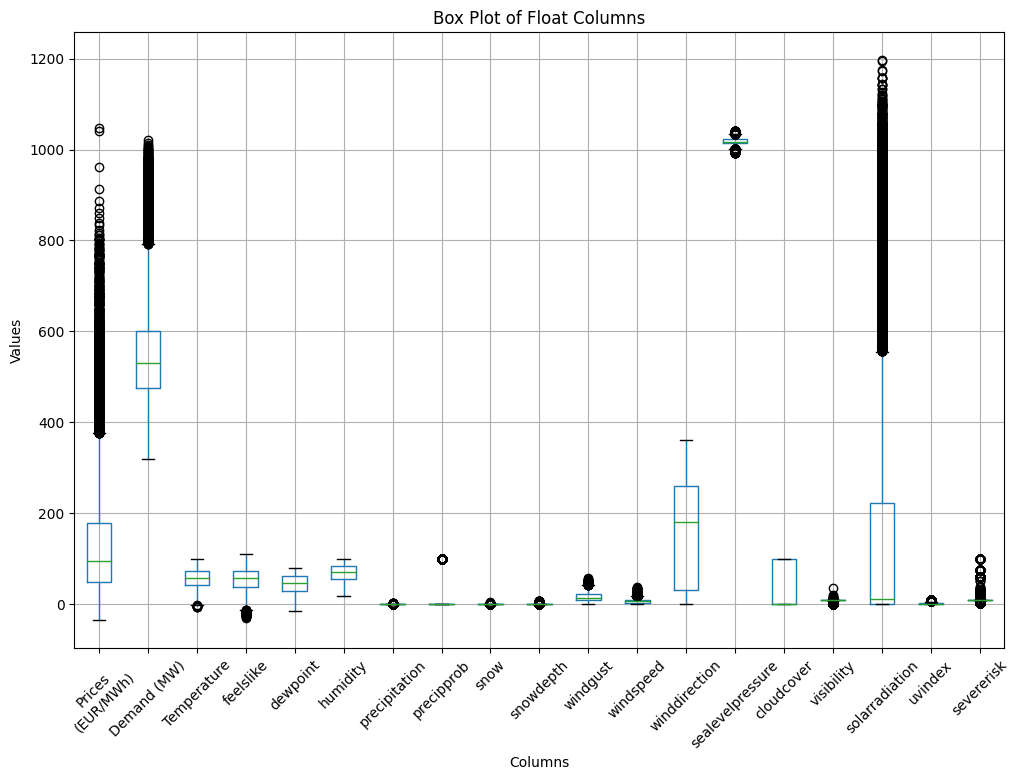

In [ ]:
float_columns = data_df.select_dtypes(include=['float']).columns

# Create a box plot for each float column in a single plot
plt.figure(figsize=(12, 8))
data_df[float_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Float Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [ ]:
def min_max_normalize_dataframe(df):
    df_normalized = df.copy()
    for column in df.columns:
        if df[column].dtype in [int, float]:
            min_val = df[column].min()
            max_val = df[column].max()
            df_normalized[column] = (df[column] - min_val) / (max_val - min_val)
    return df_normalized

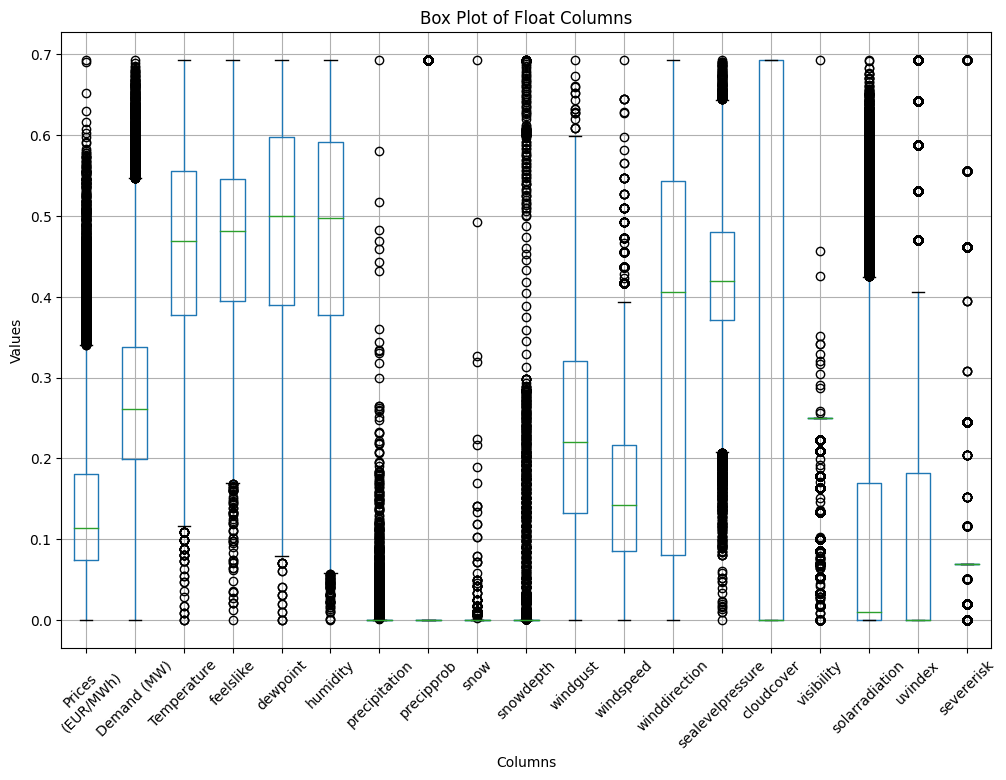

In [ ]:
float_columns = data_df.select_dtypes(include=['float']).columns


# Perform min-max normalization on the DataFrame
normalized_df = min_max_normalize_dataframe(data_df)
# Apply the np log1p transformation on the normalized data
abc = normalized_df[float_columns].apply(np.log1p)

# Create a box plot for each float column in a single plot
plt.figure(figsize=(12, 8))
abc.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Float Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

* First, the min max normalization was appled on the given data
* We have applied the np.log1p transformation on our data so as to handle the outliers.

# Convert categorical values into the one-hot encoding

In [ ]:
copy_data_df.head()

,Delivery Day,Hours,Prices\n(EUR/MWh),datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,1/1/2020,H1,26.38,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,...,NaN,4.7,230.0,1015.3,100.0,9.9,0.0,0.0,NaN,Overcast
1,1/1/2020,H2,26.50,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,...,NaN,3.4,230.0,1015.4,100.0,9.9,0.0,0.0,NaN,Overcast
2,1/1/2020,H3,27.01,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,...,NaN,4.7,220.0,1015.3,88.9,9.9,0.0,0.0,NaN,Partially cloudy
3,1/1/2020,H4,27.40,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,...,NaN,3.4,240.0,1015.2,0.0,9.9,0.0,0.0,NaN,Clear
4,1/1/2020,H5,27.99,2020-01-01 05:00:00,432.1,Pokhara,34.1,29.8,28.1,78.64,...,NaN,4.7,230.0,1015.4,0.0,9.9,0.0,0.0,NaN,Clear


In [ ]:
copy_data_df.columns

Index(['Delivery Day', 'Hours', 'Prices\n(EUR/MWh)', 'datetime', 'Demand (MW)',
       'Name', 'Temperature', 'feelslike', 'dewpoint', 'humidity',
       'precipitation', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddirection', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex', 'severerisk',
       'conditions'],
      dtype='object')

In [ ]:
print(copy_data_df.preciptype.value_counts())
print()
print(copy_data_df.conditions.value_counts())

rain                     2402
snow                      215
rain,snow                  96
freezingrain               23
ice                        12
freezingrain,snow,ice       1
freezingrain,ice            1
snow,ice                    1
Name: preciptype, dtype: int64

Clear                                                  14352
Overcast                                                6074
Partially cloudy                                        5379
Rain, Overcast                                          1327
Rain, Partially cloudy                                   365
Snow, Rain, Overcast                                      93
Snow, Overcast                                            82
Rain                                                      24
Freezing Drizzle/Freezing Rain, Overcast                  11
Ice, Overcast                                              7
Snow, Rain, Partially cloudy                               3
Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast      

In [ ]:
print("freezingrain,snow,ice".split(","))
print("freezingrain".split(","))

['freezingrain', 'snow', 'ice']
['freezingrain']


In [ ]:
# Split the categories into separate columns and perform one-hot encoding
df_one_hot = copy_data_df['preciptype'].str.get_dummies(',')
# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([copy_data_df, df_one_hot], axis=1)
df = df.drop('preciptype', axis=1)

In [ ]:
df.head()

,Delivery Day,Hours,Prices\n(EUR/MWh),datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,...,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,freezingrain,ice,rain,snow
0,1/1/2020,H1,26.38,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,...,100.0,9.9,0.0,0.0,NaN,Overcast,0,0,0,0
1,1/1/2020,H2,26.50,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,...,100.0,9.9,0.0,0.0,NaN,Overcast,0,0,0,0
2,1/1/2020,H3,27.01,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,...,88.9,9.9,0.0,0.0,NaN,Partially cloudy,0,0,0,0
3,1/1/2020,H4,27.40,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,...,0.0,9.9,0.0,0.0,NaN,Clear,0,0,0,0
4,1/1/2020,H5,27.99,2020-01-01 05:00:00,432.1,Pokhara,34.1,29.8,28.1,78.64,...,0.0,9.9,0.0,0.0,NaN,Clear,0,0,0,0


In [ ]:
df['conditions'] = df['conditions'].str.replace(', ', ',')

In [ ]:
# Split the categories into separate columns and perform one-hot encoding
df_one_hot = df['conditions'].str.get_dummies(',')
# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, df_one_hot], axis=1)
df = df.drop('conditions', axis=1)

In [ ]:
df.columns

Index(['Delivery Day', 'Hours', 'Prices\n(EUR/MWh)', 'datetime', 'Demand (MW)',
       'Name', 'Temperature', 'feelslike', 'dewpoint', 'humidity',
       'precipitation', 'precipprob', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddirection', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'severerisk', 'freezingrain',
       'ice', 'rain', 'snow', 'Clear', 'Freezing Drizzle/Freezing Rain', 'Ice',
       'Overcast', 'Partially cloudy', 'Rain', 'Snow'],
      dtype='object')

In [ ]:
df.head()

,Delivery Day,Hours,Prices\n(EUR/MWh),datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,...,ice,rain,snow,Clear,Freezing Drizzle/Freezing Rain,Ice,Overcast,Partially cloudy,Rain,Snow
0,1/1/2020,H1,26.38,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,...,0,0,0,0,0,0,1,0,0,0
1,1/1/2020,H2,26.50,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,...,0,0,0,0,0,0,1,0,0,0
2,1/1/2020,H3,27.01,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,...,0,0,0,0,0,0,0,1,0,0
3,1/1/2020,H4,27.40,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,...,0,0,0,1,0,0,0,0,0,0
4,1/1/2020,H5,27.99,2020-01-01 05:00:00,432.1,Pokhara,34.1,29.8,28.1,78.64,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.drop(columns = ["Delivery Day", "Hours"], axis = 1, inplace = True)
df.head()

,Prices\n(EUR/MWh),datetime,Demand (MW),Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,...,ice,rain,snow,Clear,Freezing Drizzle/Freezing Rain,Ice,Overcast,Partially cloudy,Rain,Snow
0,26.38,2020-01-01 01:00:00,424.5,Pokhara,38.0,34.4,29.9,72.37,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,26.50,2020-01-01 02:00:00,423.5,Pokhara,38.0,35.7,30.8,75.06,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,27.01,2020-01-01 03:00:00,418.8,Pokhara,37.1,33.4,29.9,74.97,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,27.40,2020-01-01 04:00:00,414.8,Pokhara,35.1,32.3,29.0,78.41,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,27.99,2020-01-01 05:00:00,432.1,Pokhara,34.1,29.8,28.1,78.64,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Hitachi/Data/"
df.to_csv(data_path + "updated_categorical_data.csv", index = False)

In [ ]:
df.columns

Index(['Prices\n(EUR/MWh)', 'datetime', 'Demand (MW)', 'Name', 'Temperature',
       'feelslike', 'dewpoint', 'humidity', 'precipitation', 'precipprob',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddirection',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex', 'severerisk', 'freezingrain', 'ice', 'rain', 'snow', 'Clear',
       'Freezing Drizzle/Freezing Rain', 'Ice', 'Overcast', 'Partially cloudy',
       'Rain', 'Snow'],
      dtype='object')